In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import json
import random
import pprint
import re

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

In [84]:
filepath = '/Users/ivylai/Desktop/Galvanize/apt_scraper/master_file0329.xlsx'

data = pd.read_excel(filepath)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            21001 non-null  int64  
 1   Unnamed: 0.1          20932 non-null  float64
 2   Unnamed: 0.1.1        17980 non-null  float64
 3   Unnamed: 0.1.1.1      17426 non-null  float64
 4   url                   21001 non-null  object 
 5   property_name         21001 non-null  object 
 6   city                  21001 non-null  object 
 7   rent                  21001 non-null  object 
 8   bed                   21001 non-null  object 
 9   bath                  21001 non-null  object 
 10  sq_ft                 21001 non-null  object 
 11  walkscore             21001 non-null  object 
 12  Unique Features       18070 non-null  object 
 13  Pet Policy            19866 non-null  object 
 14  Parking               18452 non-null  object 
 15  Property Informatio

In [86]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'url', 'property_name', 'city', 'rent', 'bed', 'bath', 'sq_ft',
       'walkscore', 'Unique Features', 'Pet Policy', 'Parking',
       'Property Information', 'Lease Length', 'Services', 'Interior',
       'Fitness & Recreation', 'Features', 'Kitchen', 'Living Space',
       'Security', 'Outdoor Space', 'Student Features', 'Cities',
       'Neighborhoods', 'ZIP Codes', 'Beds', 'Property Style', 'Amenity',
       'Specialty', 'Price'],
      dtype='object')

In [87]:
# Drop the unneeded features
data_1 = data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Student Features',
       'Cities', 'Neighborhoods', 'ZIP Codes', 'Beds', 'Property Style',
       'Amenity', 'Specialty', 'Price'])

In [88]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   21001 non-null  object
 1   property_name         21001 non-null  object
 2   city                  21001 non-null  object
 3   rent                  21001 non-null  object
 4   bed                   21001 non-null  object
 5   bath                  21001 non-null  object
 6   sq_ft                 21001 non-null  object
 7   walkscore             21001 non-null  object
 8   Unique Features       18070 non-null  object
 9   Pet Policy            19866 non-null  object
 10  Parking               18452 non-null  object
 11  Property Information  20004 non-null  object
 12  Lease Length          17594 non-null  object
 13  Services              17958 non-null  object
 14  Interior              17047 non-null  object
 15  Fitness & Recreation  18288 non-null

In [89]:
# Ensure city names are standardized 
data_1['city'] = data_1['city'].str.title()
data_1['city'].sort_values().unique()

array(['Alameda', 'Albany', 'Anaheim', 'Antelope', 'Aptos', 'Arcata',
       'Atascadero', 'Auburn', 'Bakersfield', 'Belmont', 'Berkeley',
       'Beverly Hills', 'Bonita', 'Brea', 'Burbank', 'Burlingame',
       'Cameron Park', 'Campbell', 'Canoga Park', 'Capitola', 'Carlsbad',
       'Carmichael', 'Carpinteria', 'Cayucos', 'Chico', 'Chula Vista',
       'Citrus Heights', 'Clovis', 'Colma', 'Corona', 'Coronado',
       'Costa Mesa', 'Culver City', 'Cupertino', 'Daly City', 'Davis',
       'Del Mar', 'East Palo Alto', 'El Cajon', 'El Cerrito',
       'El Dorado Hills', 'El Segundo', 'Elk Grove', 'Emeryville',
       'Encinitas', 'Escondido', 'Eureka', 'Fair Oaks', 'Fairfield',
       'Felton', 'Folsom', 'Forest Ranch', 'Foster City', 'Fremont',
       'Fresno', 'Gilroy', 'Gold River', 'Goleta', 'Grass Valley',
       'Grover Beach', 'Harmony', 'Hollywood', 'Huntington Beach',
       'Irvine', 'Isla Vista', 'La Jolla', 'La Mesa', 'La Palma',
       'Lakeport', 'Lemon Grove', 'Lompoc', '

In [90]:
data_1['city'].sort_values().nunique()

169

#### Find the top 5 cities with the most listings and the average rental value for each city. 

In [91]:
data_1['rent'][data_1['rent'].str.contains('Call for Rent')]

43       Call for Rent
44       Call for Rent
57       Call for Rent
61       Call for Rent
63       Call for Rent
             ...      
20821    Call for Rent
20822    Call for Rent
20823    Call for Rent
20824    Call for Rent
20825    Call for Rent
Name: rent, Length: 5207, dtype: object

In [92]:
data_2 = data_1.drop(index = data_1[data_1['rent'].str.contains('Call for Rent')].index)

In [93]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15794 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   15794 non-null  object
 1   property_name         15794 non-null  object
 2   city                  15794 non-null  object
 3   rent                  15794 non-null  object
 4   bed                   15794 non-null  object
 5   bath                  15794 non-null  object
 6   sq_ft                 15794 non-null  object
 7   walkscore             15794 non-null  object
 8   Unique Features       13157 non-null  object
 9   Pet Policy            14763 non-null  object
 10  Parking               13677 non-null  object
 11  Property Information  14798 non-null  object
 12  Lease Length          12852 non-null  object
 13  Services              13213 non-null  object
 14  Interior              12238 non-null  object
 15  Fitness & Recreation  13366 non-null

In [94]:
data_2['rent'][data_2['rent'].str.contains('Person')]
data_3 = data_2.drop(index = data_2[data_2['rent'].str.contains('Person')].index)

In [95]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15595 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   15595 non-null  object
 1   property_name         15595 non-null  object
 2   city                  15595 non-null  object
 3   rent                  15595 non-null  object
 4   bed                   15595 non-null  object
 5   bath                  15595 non-null  object
 6   sq_ft                 15595 non-null  object
 7   walkscore             15595 non-null  object
 8   Unique Features       12986 non-null  object
 9   Pet Policy            14621 non-null  object
 10  Parking               13543 non-null  object
 11  Property Information  14599 non-null  object
 12  Lease Length          12686 non-null  object
 13  Services              13017 non-null  object
 14  Interior              12057 non-null  object
 15  Fitness & Recreation  13216 non-null

#### EDA around sq-ft

In [96]:
data_3.sq_ft.sort_values().unique()

array(['1 sq ft', '1,000 sq ft', '1,000 – 1,014 sq ft', ...,
       '998 – 1,346 sq ft', '999 sq ft', '999 – 1,023 sq ft'],
      dtype=object)

In [121]:
data_3['sq_ft_range'] = 0
data_3['sq_ft_range'][data_3['sq_ft'].str.contains(' – ')] = 1

In [122]:
data_3.head(10)

,url,property_name,city,rent,bed,bath,sq_ft,walkscore,Unique Features,Pet Policy,...,Features,Kitchen,Living Space,Security,Outdoor Space,sq_ft_range,rent_range,min_sq_ft,max_sq_ft,sq_ft_updated
0,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,545",Studio,1 bath,576,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,0,576,576,576.0
1,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,611 – $2,686",1 bed,1 bath,655,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,1,655,655,655.0
2,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,619 – $2,669",1 bed,1 bath,721,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,1,721,721,721.0
3,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,674 – $2,799",1 bed,1 bath,696 – 724,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,1,1,696,724,710.0
4,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,700 – $2,775",1 bed,1 bath,691,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,1,691,691,691.0
5,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,733 – $2,783",1 bed,1 bath,735,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,1,735,735,735.0
6,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,905 – $3,080",1 bed,1 bath,821 – 849,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,1,1,821,849,835.0
7,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$3,070",1 bed,1 bath,881,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,0,881,881,881.0
8,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,576 – $2,751",1 bed,1 bath,636,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0,1,636,636,636.0
9,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$3,229",1 bed,1 bath,922,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:

In [123]:
data_3['sq_ft'] = data_3['sq_ft'].replace(' sq ft',"", regex = True)
data_3['sq_ft']

0              576
1              655
2              721
3        696 – 724
4              691
           ...    
20996          350
20997          754
20998          470
20999          580
21000          580
Name: sq_ft, Length: 15595, dtype: object

In [124]:
data_3['min_sq_ft'] = data_3['sq_ft']
data_3['max_sq_ft'] = data_3['sq_ft']

data_3['min_sq_ft'] = data_3['min_sq_ft'].transform(lambda x: re.search('(.+?) – ', x).group(1) if re.search('(.+?) – ', x) else x)
data_3['max_sq_ft'] = data_3['max_sq_ft'].transform(lambda x: re.split(r" – ", x)[1] if re.search('(.+?) – ', x) else x)

data_3['min_sq_ft'] = data_3['min_sq_ft'].replace('[\,]',"",regex=True).astype(int)
data_3['max_sq_ft'] = data_3['max_sq_ft'].replace('[\,]',"",regex=True).astype(int)

data_3[['sq_ft','min_sq_ft','max_sq_ft']][data_3['sq_ft'].str.contains(' – ')]

,sq_ft,min_sq_ft,max_sq_ft
3,696 – 724,696,724
6,821 – 849,821,849
10,"1,000 – 1,052",1000,1052
11,"952 – 1,000",952,1000
13,"1,201 – 1,204",1201,1204
...,...,...,...
20648,"895 – 1,050",895,1050
20779,340 – 390,340,390
20781,602 – 660,602,660
20842,230 – 300,230,300


In [125]:
data_3['sq_ft_updated'] = data_3.loc[: , "min_sq_ft":"max_sq_ft"].mean(axis=1)

data_3[['sq_ft','min_sq_ft','max_sq_ft', 'sq_ft_updated']]

,sq_ft,min_sq_ft,max_sq_ft,sq_ft_updated
0,576,576,576,576.0
1,655,655,655,655.0
2,721,721,721,721.0
3,696 – 724,696,724,710.0
4,691,691,691,691.0
...,...,...,...,...
20996,350,350,350,350.0
20997,754,754,754,754.0
20998,470,470,470,470.0
20999,580,580,580,580.0


In [126]:
data_3.sq_ft_updated.describe()

count    15595.000000
mean       948.615582
std        428.054995
min          1.000000
25%        700.000000
50%        884.000000
75%       1113.000000
max      12293.000000
Name: sq_ft_updated, dtype: float64

In [127]:
data_3.sq_ft_updated.sort_values().head(10)

20491      1.0
11893    100.0
11846    100.0
11847    100.0
3702     100.0
11849    100.0
11850    100.0
11851    100.0
11852    100.0
11853    100.0
Name: sq_ft_updated, dtype: float64

In [128]:
data_3.sq_ft_updated.sort_values(ascending = False).head(10)

3435     12293.0
17217     9999.0
17216     9999.0
12594     6888.0
4229      6580.0
20971     6040.0
4252      5787.0
20968     5700.0
4847      5700.0
4243      5671.0
Name: sq_ft_updated, dtype: float64

In [129]:
data_3[data_3.sq_ft_updated > 5000]

,url,property_name,city,rent,bed,bath,sq_ft,walkscore,Unique Features,Pet Policy,...,Features,Kitchen,Living Space,Security,Outdoor Space,sq_ft_range,rent_range,min_sq_ft,max_sq_ft,sq_ft_updated
3435,https://www.apartments.com/1044-calma-dr-chula...,1044 Calma Dr,Chula Vista,"$4,000",4 beds,3 baths,"12,293",44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,12293,12293,12293.0
4229,https://www.apartments.com/2605-calle-del-oro-...,2605 Calle Del Oro,San Diego,"$65,000",4 beds,5 baths,"6,580",51,NaN,No Pets Allowed,...,•Smoke Free\n•Fireplace,•Breakfast Nook,•Office\n•Views\n•Furnished,NaN,NaN,0,0,6580,6580,6580.0
4243,https://www.apartments.com/5802-corral-way-san...,5802 Corral Way,San Diego,"$26,500",4 beds,3.5 baths,"5,671",5,NaN,No Pets Allowed,...,•Washer/Dryer - In Unit\n•Air Conditioning\n•H...,•Dishwasher\n•Disposal\n•Microwave\n•Oven\n•Ra...,•Carpet\n•Tile Floors\n•Dining Room\n•Family R...,NaN,•Balcony,0,0,5671,5671,5671.0
4252,https://www.apartments.com/838-forward-st-san-...,838 Forward St,San Diego,"$18,000",6 beds,4 baths,"5,787",64,NaN,No Pets Allowed,...,•Washer/Dryer - In Unit\n•Air Conditioning\n•H...,•Dishwasher\n•Disposal\n•Refrigerator,•Furnished,NaN,•Grill,0,0,5787,5787,5787.0
4847,https://www.apartments.com/5802-corral-way-san...,5802 Corral Way,San Diego,"$26,500",4 beds,3.5 baths,"5,700",5,NaN,NaN,...,•Washer/Dryer Hookup\n•Air Conditioning\n•Cabl...,•Dishwasher\n•Microwave\n•Range\n•Refrigerator,NaN,NaN,•Yard,0,0,5700,5700,5700.0
6303,https://www.apartments.com/1696-gil-way-vista-...,1696 Gil Way,Vista,"$15,000",6 beds,5.5 baths,"5,120",-,NaN,Dogs and Cats Allowed,...,•Washer/Dryer - In Unit\n•Air Conditioning\n•H...,•Dishwasher\n•Microwave\n•Refrigerator,•Vinyl Flooring\n•Views\n•Furnished,NaN,•Balcony,0,0,5120,5120,5120.0
6308,https://www.apartments.com/1055-colucci-dr-vis...,1055 Colucci Dr,Vista,"$5,500",5 beds,4.5 baths,"5,300",37,NaN,Dogs and Cats Allowed,...,•Washer/Dryer - In Unit\n•Washer/Dryer Hookup\...,•Dishwasher\n•Disposal\n•Granite Countertops\n...,•Tile Floors\n•Dining Room\n•Sunroom\n•Views\n...,•Security System,•Gated\n•Patio\n•Yard,0,0,5300,5300,5300.0
6322,https://www.apartments.com/5-br-45-bath-house-...,"5 br, 4.5 bath House - 1055 Colucci Drive",Vista,"$5,500",5 beds,4.5 baths,"5,300",37,"•Amenities - Cooling System: Central, Amenitie...",Dogs and Cats Allowed,...,•Washer/Dryer - In Unit,•Dishwasher,NaN,NaN,NaN,0,0,5300,5300,5300.0
12594,https://www.apartments.com/1423-martin-luther-...,1423 Martin Luther King Jr Way Unit A2,Berkeley,"$1,775",1 bed,1 bath,"6,888",92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,6888,6888,6888.0
17216,https://www.apartments.com/1285-oak-grove-ave-...,1285 Oak Grove Ave,Burlingame,"$1,875",Studio,1 bath,"9,999",90,NaN,Cats Allowed,...,•Washer/Dryer - In Unit\n•Heating\n•Smoke Free...,•Dishwasher\n•Kitchen\n•Refrigerator,•Hardwood Floors\n•Crown Molding,NaN,NaN,0,0,9999,9999,9999.0


In [130]:
data_3[data_3.sq_ft_updated < 200]['bed'].value_counts()

1 bed     24
2 beds    15
Studio    13
3 beds     2
Name: bed, dtype: int64

In [131]:
data_3[data_3.sq_ft_updated > 5000]['bed'].value_counts()

4 beds    4
1 bed     3
6 beds    2
Studio    2
5 beds    2
Name: bed, dtype: int64

In [132]:
data_3.columns

Index(['url', 'property_name', 'city', 'rent', 'bed', 'bath', 'sq_ft',
       'walkscore', 'Unique Features', 'Pet Policy', 'Parking',
       'Property Information', 'Lease Length', 'Services', 'Interior',
       'Fitness & Recreation', 'Features', 'Kitchen', 'Living Space',
       'Security', 'Outdoor Space', 'sq_ft_range', 'rent_range', 'min_sq_ft',
       'max_sq_ft', 'sq_ft_updated'],
      dtype='object')

In [133]:
data_4 = data_3[(1 < data_3.sq_ft_updated) & (data_3.sq_ft_updated < 9000)][['url', 'property_name', 'city', 'rent', 'bed', 'bath', 'sq_ft_updated',
       'walkscore', 'Unique Features', 'Pet Policy', 'Parking',
       'Property Information', 'Lease Length', 'Services', 'Interior',
       'Fitness & Recreation', 'Features', 'Kitchen', 'Living Space',
       'Security', 'Outdoor Space',  'sq_ft_range']]
data_4.head(1)

,url,property_name,city,rent,bed,bath,sq_ft_updated,walkscore,Unique Features,Pet Policy,...,Lease Length,Services,Interior,Fitness & Recreation,Features,Kitchen,Living Space,Security,Outdoor Space,sq_ft_range
0,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,"$2,545",Studio,1 bath,576.0,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,"Available months 12,13,14,15",•24 Hour Availability\n•Pet Washing Station\n•...,•Elevator\n•Business Center\n•Lounge\n•Multi U...,•Fitness Center\n•Pool\n•Bike Storage,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN,0


In [134]:
data_4.sq_ft_updated.sort_values()

11893     100.0
11844     100.0
11845     100.0
3702      100.0
11847     100.0
          ...  
20968    5700.0
4252     5787.0
20971    6040.0
4229     6580.0
12594    6888.0
Name: sq_ft_updated, Length: 15591, dtype: float64

There is a small portion of the listings with unusual sq-ft (e.g. a studio that is over 5,000 sq-ft). After evaluating the data, I decided to drop only the minimum (1 sq-ft) and 2 highest values (9,999 sq-ft and 12,293 sq-ft).

#### Rental Price 

In [135]:
data_4['rent_range'] = 0
data_4['rent_range'][data_4['rent'].str.contains(' – ')] = 1

In [117]:
8190 / len(data_4)

0.5253030594573792

In [136]:
data_4['min_rent'] = data_4['rent']
data_4['max_rent'] = data_4['rent']

data_4['min_rent'] = data_4['min_rent'].transform(lambda x: re.search('(.+?) – ', x).group(1) if re.search('(.+?) – ', x) else x)
data_4['max_rent'] = data_4['max_rent'].transform(lambda x: re.split(r" – ", x)[1] if re.search('(.+?) – ', x) else x)

data_4['min_rent'] = data_4['min_rent'].replace('[\$\,\.]',"",regex=True).astype(int)
data_4['max_rent'] = data_4['max_rent'].replace('[\$\,\.]',"",regex=True).astype(int)

data_4['rent_updated'] = data_4.loc[: , "min_rent":"max_rent"].mean(axis=1)

data_4[['rent','min_rent','max_rent', 'rent_updated']]


,rent,min_rent,max_rent,rent_updated
0,"$2,545",2545,2545,2545.0
1,"$2,611 – $2,686",2611,2686,2648.5
2,"$2,619 – $2,669",2619,2669,2644.0
3,"$2,674 – $2,799",2674,2799,2736.5
4,"$2,700 – $2,775",2700,2775,2737.5
...,...,...,...,...
20996,"$1,900",1900,1900,1900.0
20997,"$3,400",3400,3400,3400.0
20998,"$1,890",1890,1890,1890.0
20999,"$1,980",1980,1980,1980.0


In [137]:
pt = pd.pivot_table(data_4,values = 'rent_updated', columns = ['city','bed']).T
pt[pt['rent_updated'] > 8000]

,,rent_updated
city,bed,
Aptos,4 beds,29990.000000
Beverly Hills,4 beds,9999.000000
Carpinteria,3 beds,39500.000000
Del Mar,2 beds,19000.000000
Encinitas,5 beds,40000.000000
Harmony,4 beds,15000.000000
Los Altos,5 beds,8922.000000
Los Altos Hills,4 beds,9000.000000
Los Gatos,5 beds,8395.000000


In [138]:
display(data_4[(data_4['city'] == 'Encinitas') & (data_4['bed'] == '5 beds')])
index_1 = data_4[(data_4['city'] == 'Encinitas') & (data_4['bed'] == '5 beds')].index

,url,property_name,city,rent,bed,bath,sq_ft_updated,walkscore,Unique Features,Pet Policy,...,Features,Kitchen,Living Space,Security,Outdoor Space,sq_ft_range,rent_range,min_rent,max_rent,rent_updated
3014,https://www.apartments.com/1470-neptune-ave-en...,1470 Neptune Ave,Encinitas,"$40,000",5 beds,4.5 baths,3500.0,51,NaN,No Pets Allowed,...,•Washer/Dryer - In Unit\n•Air Conditioning\n•H...,•Dishwasher\n•Oven\n•Range\n•Refrigerator,•Furnished,•Concierge,•Grill,0,0,40000,40000,40000.0


In [139]:
display(data_4[(data_4['city'] == 'Carpinteria') & (data_4['bed'] == '3 beds')])
index_2 = data_4[(data_4['city'] == 'Carpinteria') & (data_4['bed'] == '3 beds')].index

,url,property_name,city,rent,bed,bath,sq_ft_updated,walkscore,Unique Features,Pet Policy,...,Features,Kitchen,Living Space,Security,Outdoor Space,sq_ft_range,rent_range,min_rent,max_rent,rent_updated
18785,https://www.apartments.com/2937-padaro-ln-carp...,2937 Padaro Ln,Carpinteria,"$39,500",3 beds,4 baths,2514.0,1,NaN,Dogs Allowed,...,•Washer/Dryer - In Unit\n•Washer/Dryer Hookup\...,NaN,•Views\n•Furnished,NaN,NaN,0,0,39500,39500,39500.0


In [140]:
display(data_4[(data_4['city'] == 'Aptos') & (data_4['bed'] == '4 beds')])
index_3 = data_4[(data_4['city'] == 'Aptos') & (data_4['bed'] == '4 beds')].index

,url,property_name,city,rent,bed,bath,sq_ft_updated,walkscore,Unique Features,Pet Policy,...,Features,Kitchen,Living Space,Security,Outdoor Space,sq_ft_range,rent_range,min_rent,max_rent,rent_updated
20903,https://www.apartments.com/122-rio-del-mar-blv...,122 Rio Del Mar Blvd Unit 122,Aptos,"$29,990",4 beds,3 baths,1563.0,54,NaN,Dogs and Cats Allowed,...,•Washer/Dryer - In Unit\n•Smoke Free,NaN,•Furnished,NaN,NaN,0,0,29990,29990,29990.0


In [141]:
data_5 = data_4.drop(index = [index_1[0], index_2[0], index_3[0]])[['url', 'property_name', 'city', 'rent_updated', 'bed', 'bath', 'sq_ft_updated',
       'walkscore', 'Unique Features', 'Pet Policy', 'Parking',
       'Property Information', 'Lease Length', 'Services', 'Interior',
       'Fitness & Recreation', 'Features', 'Kitchen', 'Living Space',
       'Security', 'Outdoor Space', 'rent_range', 'sq_ft_range']]

In [282]:
bed_group = data_5.groupby('bed')

for bed_num, bed_data in bed_group:
    print(bed_num)
    print(bed_data.bath.unique())
    print("")

1 bed
['1 bath' '1.5 baths' '2 baths' '1.25 baths' '3 baths' '0.5 bath'
 '2.5 baths']

2 beds
['2 baths' '1 bath' '2.5 baths' '1.25 baths' '1.5 baths' '3 baths'
 '2.75 baths' '1.75 baths' '4 baths']

3 beds
['2 baths' '2.5 baths' '1 bath' '3 baths' '1.5 baths' '3.5 baths'
 '4 baths' '1.75 baths' '4.5 baths']

4 beds
['4 baths' '2 baths' '2.5 baths' '3 baths' '4.5 baths' '1.5 baths'
 '3.5 baths' '1 bath' '5 baths']

5 beds
['4 baths' '3 baths' '3.5 baths' '2.5 baths' '6 baths' '2 baths' '5 baths'
 '5.5 baths' '4.5 baths']

6 beds
['3 baths' '4 baths' '5.5 baths' '4.5 baths' '2 baths' '3.5 baths']

7 beds
['4 baths']

Studio
['1 bath' '1.5 baths' '2 baths' '0.5 bath']



In [271]:
bed_group = data_5.groupby('bed')

names = []
bed_mean = []
bed_std = []

for bed_num, bed_data in bed_group:
    names.append(bed_num)
    bed_mean.append(bed_data.rent_updated.mean())
    bed_std.append(bed_data.rent_updated.std())

In [257]:
for i, name in enumerate(names):
    names[i] = name.replace('beds', 'Bedrooms')
names[0] = '1 Bedroom'
names

['1 Bedroom',
 '2 Bedrooms',
 '3 Bedrooms',
 '4 Bedrooms',
 '5 Bedrooms',
 '6 Bedrooms',
 '7 Bedrooms',
 'Studio']

In [272]:
names = [names[-1]] + names[0:-1]
names

['Studio', '1 bed', '2 beds', '3 beds', '4 beds', '5 beds', '6 beds', '7 beds']

In [273]:
bed_mean = [bed_mean[-1]] + bed_mean[0:-1]
bed_std = [bed_std[-1]] + bed_std[0:-1]

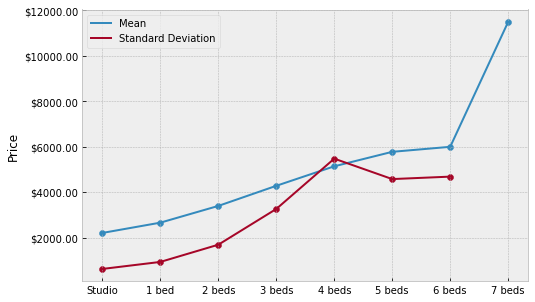

In [275]:
fig, ax = plt.subplots(figsize = (8,5))

x = np.arange(8)
ax.plot(x, bed_mean, label = 'Mean')
ax.scatter(x, bed_mean)
ax.plot(x, bed_std, label = 'Standard Deviation')
ax.scatter(x, bed_std)
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_ylabel('Price')
ax.set_xticks(np.arange(8))
ax.set_xticklabels(names)
ax.legend()

In [183]:
x = data_5.bed.value_counts()

In [184]:
x

2 beds    6375
1 bed     5908
Studio    1625
3 beds    1382
4 beds     221
5 beds      62
6 beds      14
7 beds       1
Name: bed, dtype: int64

In [186]:
x_1 = x[:5]
x_1[4] = (221+62+14+1)

2 beds    6375
1 bed     5908
Studio    1625
3 beds    1382
4 beds     298
Name: bed, dtype: int64

In [190]:
x_2 = x_1/sum(x_1)
x_2

2 beds    0.408968
1 bed     0.379009
Studio    0.104247
3 beds    0.088658
4 beds    0.019117
Name: bed, dtype: float64

Text(0.5, 1.0, 'Number of Bedrooms Distribution')

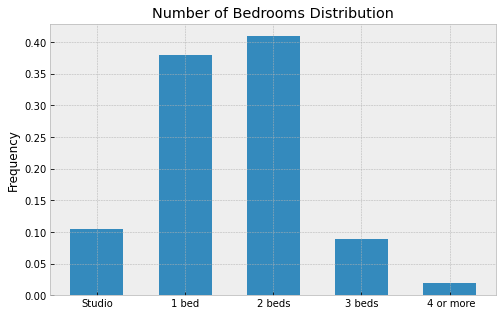

In [276]:
fig, ax = plt.subplots(figsize = (8,5))
labels = np.array(['2 beds', '1 bed', 'Studio', '3 beds', ' 4 or more'])
ax.bar(labels[[2,1,0,3,4]], x_2[[2,1,0,3,4]], width = 0.6)
ax.set_ylabel('Frequency')
ax.set_title('Number of Bedrooms Distribution')

In [435]:
data_5.head()

,url,property_name,city,rent_updated,bed,bath,sq_ft_updated,walkscore,Unique Features,Pet Policy,...,Property Information,Lease Length,Services,Interior,Fitness & Recreation,Features,Kitchen,Living Space,Security,Outdoor Space
0,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,2545.0,Studio,1 bath,576.0,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•Built in 2020\n•302 Units/5 Stories,"Available months 12,13,14,15",•24 Hour Availability\n•Pet Washing Station\n•...,•Elevator\n•Business Center\n•Lounge\n•Multi U...,•Fitness Center\n•Pool\n•Bike Storage,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN
1,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,2648.5,1 bed,1 bath,655.0,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•Built in 2020\n•302 Units/5 Stories,"Available months 12,13,14,15",•24 Hour Availability\n•Pet Washing Station\n•...,•Elevator\n•Business Center\n•Lounge\n•Multi U...,•Fitness Center\n•Pool\n•Bike Storage,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN
2,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,2644.0,1 bed,1 bath,721.0,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•Built in 2020\n•302 Units/5 Stories,"Available months 12,13,14,15",•24 Hour Availability\n•Pet Washing Station\n•...,•Elevator\n•Business Center\n•Lounge\n•Multi U...,•Fitness Center\n•Pool\n•Bike Storage,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN
3,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,2736.5,1 bed,1 bath,710.0,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•Built in 2020\n•302 Units/5 Stories,"Available months 12,13,14,15",•24 Hour Availability\n•Pet Washing Station\n•...,•Elevator\n•Business Center\n•Lounge\n•Multi U...,•Fitness Center\n•Pool\n•Bike Storage,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN
4,https://www.apartments.com/aya-fremont-ca/wxez...,AYA,Fremont,2737.5,1 bed,1 bath,691.0,22,•BBQ Grills\n•Ceramic Kitchen Tile Surround\n•...,Dogs and Cats Allowed:\n•Restrictions: We welc...,...,•Built in 2020\n•302 Units/5 Stories,"Available months 12,13,14,15",•24 Hour Availability\n•Pet Washing Station\n•...,•Elevator\n•Business Center\n•Lounge\n•Multi U...,•Fitness Center\n•Pool\n•Bike Storage,•High Speed Internet Access\n•Wi-Fi\n•Washer/D...,•Dishwasher\n•Disposal\n•Ice Maker\n•Stainless...,•Den\n•Views\n•Walk-In Closets,•Controlled Access\n•Property Manager on Site,NaN


#### Minimum Lease

In [388]:
# Manipulate the data in excel
path = '/Users/ivylai/Desktop/Galvanize/apt_scrapper/lease_info.xlsx'
pd.DataFrame(data_5['Lease Length'].unique()).to_excel(excel_writer = path)

In [143]:
path = '/Users/ivylai/Desktop/Galvanize/W08/CaliforniaRentalValueEstimation/data-cleaning/lease_length.xlsx'
minimum_lease = pd.read_excel(path)

In [144]:
minimum_lease.drop(columns = 'Unnamed: 0', inplace= True)

In [145]:
data_5 = data_5.merge(minimum_lease, on = 'Lease Length')

In [146]:
data_5[data_5['Lease Length'].isnull()][['Lease Length','minimum_lease']]

,Lease Length,minimum_lease
5522,NaN,12
5523,NaN,12
5524,NaN,12
5525,NaN,12
5526,NaN,12
...,...,...
8421,NaN,12
8422,NaN,12
8423,NaN,12
8424,NaN,12


#### Pet Policy

In [418]:
path = '/Users/ivylai/Desktop/Galvanize/apt_scrapper/pt_info.xlsx'
pd.DataFrame(data_5['Pet Policy'].unique()).to_excel(excel_writer = path)

In [147]:
path = '/Users/ivylai/Desktop/Galvanize/W08/CaliforniaRentalValueEstimation/data-cleaning/allow_pets.xlsx'
allow_pets = pd.read_excel(path)

allow_pets

,Pet Policy,allow_pet
0,Dogs and Cats Allowed:\n•Restrictions: We welc...,1
1,Dogs and Cats Allowed:\n•Restrictions: We welc...,1
2,Dogs and Cats Allowed:\n•Restrictions: We welc...,1
3,Dogs and Cats Allowed:\n•Restrictions: We welc...,1
4,Dogs and Cats Allowed:\n•Restrictions: Contact...,1
...,...,...
1576,Dogs Allowed\n•Comments: Under 25lbs •$500 Dep...,1
1577,Dogs and Cats Allowed:\n•Restrictions: We are ...,1
1578,Pets NegotiableDogs and Cats Allowed\n•$500 De...,1
1579,Dogs and Cats Allowed:\n•Restrictions: There i...,1


In [148]:
data_6 = data_5.merge(allow_pets, on = 'Pet Policy')

data_6.allow_pet.value_counts()

1    13072
0     2516
Name: allow_pet, dtype: int64

#### Parking

In [149]:
data_6.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'bed', 'bath',
       'sq_ft_updated', 'walkscore', 'Unique Features', 'Pet Policy',
       'Parking', 'Property Information', 'Lease Length', 'Services',
       'Interior', 'Fitness & Recreation', 'Features', 'Kitchen',
       'Living Space', 'Security', 'Outdoor Space', 'rent_range',
       'sq_ft_range', 'minimum_lease', 'allow_pet'],
      dtype='object')

In [150]:
data_6 = data_6[['url', 'property_name', 'city', 'rent_updated', 'bed', 'bath',
       'sq_ft_updated', 'walkscore', 'Unique Features', 'Pet Policy', 
       'allow_pet','Parking', 'Property Information', 'Lease Length', 'minimum_lease','Services',
       'Interior', 'Fitness & Recreation', 'Features', 'Kitchen',
       'Living Space', 'Security', 'Outdoor Space', 'rent_range', 'sq_ft_range']]

In [431]:
path = '/Users/ivylai/Desktop/Galvanize/apt_scrapper/parking_info.xlsx'
pd.DataFrame(data_5['Parking'].unique()).to_excel(excel_writer = path)

In [151]:
path = '/Users/ivylai/Desktop/Galvanize/W08/CaliforniaRentalValueEstimation/data-cleaning/parking_info.xlsx'
parking_info = pd.read_excel(path)

parking_info

,Parking,surface_lot,garage,covered_carport,onsite_parking
0,GarageAssigned Parking. One complimentary assi...,0,1,0,1
1,Garage1 space; Assigned Parking. \n \n OtherP...,0,1,0,1
2,OtherOne reserved parking space per apartment ...,0,0,0,0
3,Surface Lot1 space. \n \n Garage: $951 space;...,1,1,0,1
4,Surface Lot1 space; Assigned Parking. \n \n C...,1,0,1,1
...,...,...,...,...,...
1337,Surface Lot: $25Assigned Parking. \n \n Cover...,1,1,1,1
1338,Surface Lot: $10\n Garage: $35Please call our ...,1,1,0,1
1339,Garage2 spaces; Assigned Parking. and tandem s...,0,1,0,1
1340,Garage1 space. Must use garage for vehicle and...,0,1,0,1


In [152]:
data_7 = data_6.merge(parking_info, on = 'Parking')

data_7['onsite_parking'].value_counts()

1    11973
0     3615
Name: onsite_parking, dtype: int64

In [54]:
data_7.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'bed', 'bath',
       'sq_ft_updated', 'walkscore', 'Unique Features', 'Pet Policy',
       'allow_pet', 'Parking', 'Property Information', 'Lease Length',
       'minimum_lease', 'Services', 'Interior', 'Fitness & Recreation',
       'Features', 'Kitchen', 'Living Space', 'Security', 'Outdoor Space',
       'surface_lot', 'garage', 'covered_carport', 'onsite_parking'],
      dtype='object')

In [153]:
data_7 = data_7[['url', 'property_name', 'city', 'rent_updated', 'bed', 'bath',
       'sq_ft_updated', 'walkscore', 'Unique Features', 'Pet Policy',
       'allow_pet', 'Parking',
       'surface_lot', 'garage', 'covered_carport', 'onsite_parking', 'Property Information', 'Lease Length',
       'minimum_lease', 'Services', 'Interior', 'Fitness & Recreation',
       'Features', 'Kitchen', 'Living Space', 'Security', 'Outdoor Space', 'rent_range', 'sq_ft_range']]

In [154]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15588 entries, 0 to 15587
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   15588 non-null  object 
 1   property_name         15588 non-null  object 
 2   city                  15588 non-null  object 
 3   rent_updated          15588 non-null  float64
 4   bed                   15588 non-null  object 
 5   bath                  15588 non-null  object 
 6   sq_ft_updated         15588 non-null  float64
 7   walkscore             15588 non-null  object 
 8   Unique Features       12986 non-null  object 
 9   Pet Policy            14615 non-null  object 
 10  allow_pet             15588 non-null  int64  
 11  Parking               13537 non-null  object 
 12  surface_lot           15588 non-null  int64  
 13  garage                15588 non-null  int64  
 14  covered_carport       15588 non-null  int64  
 15  onsite_parking     

#### Bed & Bath

In [57]:
data_7.bed.value_counts()

2 beds    6375
1 bed     5908
Studio    1625
3 beds    1382
4 beds     221
5 beds      62
6 beds      14
7 beds       1
Name: bed, dtype: int64

In [155]:
data_7['n_bed'] = data_7['bed'].transform(lambda x: 0 if str(x) == 'Studio' else int(str(x)[0]))
data_7[['bed','n_bed']].value_counts()

bed     n_bed
2 beds  2        6375
1 bed   1        5908
Studio  0        1625
3 beds  3        1382
4 beds  4         221
5 beds  5          62
6 beds  6          14
7 beds  7           1
dtype: int64

In [59]:
data_7.bath.value_counts()

1 bath        8626
2 baths       5629
2.5 baths      464
1.5 baths      411
3 baths        328
3.5 baths       51
4 baths         45
5 baths         11
4.5 baths        9
5.5 baths        4
1.25 baths       3
0.5 bath         3
1.75 baths       2
6 baths          1
2.75 baths       1
Name: bath, dtype: int64

In [156]:
data_7['n_bath'] = data_7['bath'].transform(lambda x: float(str(x).replace(" bath", "").replace("s", "")))
data_7[['bath','n_bath']].value_counts()

bath        n_bath
1 bath      1.00      8626
2 baths     2.00      5629
2.5 baths   2.50       464
1.5 baths   1.50       411
3 baths     3.00       328
3.5 baths   3.50        51
4 baths     4.00        45
5 baths     5.00        11
4.5 baths   4.50         9
5.5 baths   5.50         4
1.25 baths  1.25         3
0.5 bath    0.50         3
1.75 baths  1.75         2
6 baths     6.00         1
2.75 baths  2.75         1
dtype: int64

#### Pool & Fitness Center

In [157]:
data_7['pool'] = data_7['Fitness & Recreation'].apply(lambda x: 1 if 'Pool' in str(x) else 0)
data_7['fitness_center'] = data_7['Fitness & Recreation'].apply(lambda x: 1 if 'Fitness Center' in str(x) else 0)

In [62]:
data_7['fitness_center'].value_counts()

1    10741
0     4847
Name: fitness_center, dtype: int64

#### Interior

In [158]:
data_7['elevator'] = data_7['Interior'].apply(lambda x: 1 if 'Elevator' in str(x) else 0)

In [64]:
data_7['elevator'].value_counts()

0    8718
1    6870
Name: elevator, dtype: int64

#### Kitchen

In [159]:
data_7['kitchen_features'] = data_7['Kitchen'].apply(lambda x: str(x).count('•'))

In [66]:
data_7['kitchen_features'].value_counts()

0     1487
4     1316
9     1290
10    1274
1     1125
8     1101
7     1040
11    1002
12     983
3      959
6      949
5      920
2      836
13     691
14     385
15     119
16      81
17      26
18       4
Name: kitchen_features, dtype: int64

#### Security

In [160]:
data_7['security_system'] = 1
data_7['security_system'][data_7['Security'].isnull()] = 0

In [68]:
data_7['security_system'].value_counts()

1    11063
0     4525
Name: security_system, dtype: int64

#### Features

In [161]:
# Washer/Dryer
data_7['washer_dryer'] = data_7['Unique Features']
data_7['washer_dryer'] = data_7['Features'].apply(lambda x: 1 if 'washer/dryer' in str(x).lower() else 0)
data_7['washer_dryer'] = data_7['washer_dryer'].apply(lambda x: 1 if 'washer/dryer' in str(x).lower() else x)
data_7.washer_dryer.value_counts()

1    10432
0     5156
Name: washer_dryer, dtype: int64

In [162]:
#High Speed Internet
data_7['internet'] = data_7['Unique Features']
data_7['internet'] = data_7['Features'].apply(lambda x: 1 if ('internet' or 'wifi' or 'wi-fi') in str(x).lower() else 0)
data_7['internet'] = data_7['internet'].apply(lambda x: 1 if ('internet' or 'wifi' or 'wi-fi') in str(x).lower() else x)
data_7.internet.value_counts()

1    10735
0     4853
Name: internet, dtype: int64

In [163]:
#Air Conditioning
data_7['air_conditioning'] = data_7['Unique Features']
data_7['air_conditioning'] = data_7['Features'].apply(lambda x: 1 if 'air conditioning' in str(x).lower() else 0)
data_7['air_conditioning'] = data_7['air_conditioning'].apply(lambda x: 1 if 'air conditioning' in str(x).lower() else x)
data_7.air_conditioning.value_counts()

1    9819
0    5769
Name: air_conditioning, dtype: int64

#### Furnished

In [164]:
# From property info, services, living space
data_7['furnished'] = data_7['Property Information']
data_7['furnished'] = data_7['Living Space'].apply(lambda x: 1 if 'furnished' in str(x).lower() else 0)
data_7['furnished'] = data_7['furnished'].apply(lambda x: 1 if 'furnished' in str(x).lower() else x)
data_7.furnished.value_counts()

0    14599
1      989
Name: furnished, dtype: int64

#### Walkscore

In [165]:
data_7['walkscore'] = data_7['walkscore'].apply(lambda x: int(x) if x != '-' else x)

avg = np.mean(data_7['walkscore'][data_7['walkscore'] != '-'])

data_7['walkscore'] = data_7['walkscore'].apply(lambda x: avg if x == '-' else x)

In [74]:
data_7['walkscore'].describe()

count    15588.000000
mean        73.160990
std         23.187239
min          0.000000
25%         58.000000
50%         79.000000
75%         93.000000
max        100.000000
Name: walkscore, dtype: float64

## Export Clean Data

In [166]:
data_7.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'bed', 'bath',
       'sq_ft_updated', 'walkscore', 'Unique Features', 'Pet Policy',
       'allow_pet', 'Parking', 'surface_lot', 'garage', 'covered_carport',
       'onsite_parking', 'Property Information', 'Lease Length',
       'minimum_lease', 'Services', 'Interior', 'Fitness & Recreation',
       'Features', 'Kitchen', 'Living Space', 'Security', 'Outdoor Space',
       'rent_range', 'sq_ft_range', 'n_bed', 'n_bath', 'pool',
       'fitness_center', 'elevator', 'kitchen_features', 'security_system',
       'washer_dryer', 'internet', 'air_conditioning', 'furnished'],
      dtype='object')

In [167]:
clean_data = data_7[['url', 'property_name', 'city', 'rent_updated', 'n_bed','n_bath',
       'sq_ft_updated', 'walkscore', 
       'allow_pet', 
       'minimum_lease', 
      'onsite_parking', 
        'pool', 'fitness_center', 'elevator', 'kitchen_features',
       'security_system', 'washer_dryer', 'internet', 'air_conditioning',
       'furnished', 'rent_range', 'sq_ft_range']]

In [168]:
clean_data_exact = data_7[['url', 'property_name', 'city', 'rent_updated', 'n_bed','n_bath',
       'sq_ft_updated', 'walkscore', 
       'allow_pet', 
       'minimum_lease', 
      'onsite_parking', 
        'pool', 'fitness_center', 'elevator', 'kitchen_features',
       'security_system', 'washer_dryer', 'internet', 'air_conditioning',
       'furnished', 'rent_range', 'sq_ft_range']][(data_7['rent_range'] == 0) & (data_7['sq_ft_range'] == 0)]

In [169]:
clean_data_exact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122 entries, 0 to 15579
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7122 non-null   object 
 1   property_name     7122 non-null   object 
 2   city              7122 non-null   object 
 3   rent_updated      7122 non-null   float64
 4   n_bed             7122 non-null   int64  
 5   n_bath            7122 non-null   float64
 6   sq_ft_updated     7122 non-null   float64
 7   walkscore         7122 non-null   float64
 8   allow_pet         7122 non-null   int64  
 9   minimum_lease     7122 non-null   int64  
 10  onsite_parking    7122 non-null   int64  
 11  pool              7122 non-null   int64  
 12  fitness_center    7122 non-null   int64  
 13  elevator          7122 non-null   int64  
 14  kitchen_features  7122 non-null   int64  
 15  security_system   7122 non-null   int64  
 16  washer_dryer      7122 non-null   int64  

In [77]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15588 entries, 0 to 15587
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               15588 non-null  object 
 1   property_name     15588 non-null  object 
 2   city              15588 non-null  object 
 3   rent_updated      15588 non-null  float64
 4   n_bed             15588 non-null  int64  
 5   n_bath            15588 non-null  float64
 6   sq_ft_updated     15588 non-null  float64
 7   walkscore         15588 non-null  float64
 8   allow_pet         15588 non-null  int64  
 9   minimum_lease     15588 non-null  int64  
 10  onsite_parking    15588 non-null  int64  
 11  pool              15588 non-null  int64  
 12  fitness_center    15588 non-null  int64  
 13  elevator          15588 non-null  int64  
 14  kitchen_features  15588 non-null  int64  
 15  security_system   15588 non-null  int64  
 16  washer_dryer      15588 non-null  int64 

In [80]:
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data.csv'
clean_data.to_csv(path)

In [171]:
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data_norange.csv'
clean_data_exact.to_csv(path)